# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis



In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Reading api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

api_key


'a39a4e8e5b7745169381279b300851e9'

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetching the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_news["totalResults"]

8329

In [5]:
# Fetching the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
eth_news["totalResults"]

2855

In [6]:
# Creating the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Creating DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()



,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [7]:
# Creating the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Creating DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [8]:
# Describing the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.195090,0.048400,0.003150,0.94845
std,0.288628,0.064743,0.014087,0.06379
min,-0.273200,0.000000,0.000000,0.80100
25%,0.000000,0.000000,0.000000,0.89650
50%,0.000000,0.000000,0.000000,1.00000
75%,0.481000,0.103500,0.000000,1.00000
max,0.755800,0.199000,0.063000,1.00000


In [9]:
# Describing the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.244525,0.051750,0.002400,0.94585
std,0.293290,0.065363,0.010733,0.06974
min,0.000000,0.000000,0.000000,0.79200
25%,0.000000,0.000000,0.000000,0.90525
50%,0.000000,0.000000,0.000000,1.00000
75%,0.475775,0.094750,0.000000,1.00000
max,0.822500,0.208000,0.048000,1.00000


In [10]:
#Sorting values by compound score to determine highest score

btc_compound_sorted = btc_df.sort_values(by=["compound"], ascending=False)
btc_compound_sorted.head()

,date,text,compound,positive,negative,neutral
12,2021-10-19,* Cryotocurrency gets boost from ETF bitcoin f...,0.7558,0.199,0.0,0.801
11,2021-11-02,Bitcoin artwork displayed at the Bitcoin 2021 ...,0.5719,0.148,0.0,0.852
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.0,0.879
14,2021-10-18,Bitcoin seen on display.\r\nRafael Henrique/SO...,0.5106,0.105,0.0,0.895
19,2021-10-15,"Posted \r\nBitcoin hit $60,000 for the first t...",0.4939,0.086,0.0,0.914


In [11]:
#Sorting values by positive score to determine highest score

btc_pos_sorted = btc_df.sort_values(by=["positive"], ascending=False)
btc_pos_sorted.head()

,date,text,compound,positive,negative,neutral
12,2021-10-19,* Cryotocurrency gets boost from ETF bitcoin f...,0.7558,0.199,0.0,0.801
11,2021-11-02,Bitcoin artwork displayed at the Bitcoin 2021 ...,0.5719,0.148,0.0,0.852
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.0,0.879
13,2021-11-06,Ether.\r\nNurPhoto\r\n<ul><li>The approval of ...,0.4767,0.110,0.0,0.890
14,2021-10-18,Bitcoin seen on display.\r\nRafael Henrique/SO...,0.5106,0.105,0.0,0.895


In [12]:
#Sorting values by compound score to determine highest score

eth_compound_sorted = eth_df.sort_values(by=["compound"], ascending=False)
eth_compound_sorted.head()

,date,text,compound,positive,negative,neutral
8,2021-10-22,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.000,0.792
14,2021-10-12,Ive always been vexed by the question of how t...,0.6705,0.146,0.048,0.806
13,2021-10-25,The worlds second most valuable cryptocurrency...,0.6478,0.150,0.000,0.850
10,2021-11-01,Grill burger chain Burger King announced a par...,0.5423,0.099,0.000,0.901
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.000,0.907


In [13]:
#Sorting values by positive score to determine highest score

eth_pos_sorted = eth_df.sort_values(by=["positive"], ascending=False)
eth_pos_sorted.head()

,date,text,compound,positive,negative,neutral
8,2021-10-22,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.000,0.792
13,2021-10-25,The worlds second most valuable cryptocurrency...,0.6478,0.150,0.000,0.850
14,2021-10-12,Ive always been vexed by the question of how t...,0.6705,0.146,0.048,0.806
10,2021-11-01,Grill burger chain Burger King announced a par...,0.5423,0.099,0.000,0.901
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.000,0.903


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer


In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()



In [16]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Creating a list of stopwords
    sw = set(stopwords.words('english'))
    
    # Expanding the default stopwords list if necessary
    sw_addons = ['taken', 'in', 'are', 'of', 'on', 'pc', 'this', 'make', 'seen', 'picture', 'virtual', 'new', 'illustration',
                'ha', 'said', 'york', 'wa', 'us']
    
    # Removing the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Creating a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatizing words into root words
    
    lemm = [lemmatizer.lemmatize(word) for word in words]
   
    # Converting the words to lowercase and removing stop words
    
    tokens = [word.lower() for word in lemm if word.lower() not in sw.union(sw_addons)]
   
    
    
    return tokens

print(set(tokenizer(text)))

{'june', 'ethereum', 'representations', 'ripple', 'litecoin', 'reutersdado', 'ruvicillustrationfile', 'dogecoin', 'cryptocurrencies', 'bitcoin', 'placed', 'photow', 'char', 'motherboard'}


In [17]:
# Creating a new tokens column for Bitcoin
btc_df["tokens"] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, massive, purchase, bil..."
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, presence, slurping, power, grid,..."
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [18]:
# Creating a new tokens column for Ethereum
eth_df["tokens"] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[crosschain, bridge, currently, connected, eth..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, investing, crypt..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis



In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generating the Bitcoin N-grams where N=2
btc = btc_df['text'].str.cat()
btc_text = tokenizer(btc)
btc_counts = Counter(ngrams(btc_text, n=2))
btc_counts.most_common(10)

[(('reuters', 'bitcoin'), 5),
 (('cryptocurrency', 'bitcoin'), 4),
 (('oct', 'reuters'), 4),
 (('representation', 'cryptocurrency'), 3),
 (('bitcoin', 'october'), 3),
 (('october', 'reutersedgar'), 3),
 (('exchangetraded', 'fund'), 3),
 (('bitcoin', 'hit'), 3),
 (('kong', 'oct'), 2),
 (('charsa', 'representation'), 2)]

In [21]:
# Generating the Ethereum N-grams where N=2
eth = eth_df['text'].str.cat()
eth_text = tokenizer(eth)
eth_counts = Counter(ngrams(eth_text, n=2))
eth_counts.most_common(10)

[(('bitcoin', 'ethereum'), 3),
 (('ethereum', 'dogecoin'), 3),
 (('crosschain', 'bridge'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('charsrepresentations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'bitcoin'), 2),
 (('dogecoin', 'ripple'), 2),
 (('ripple', 'litecoin'), 2),
 (('litecoin', 'placed'), 2),
 (('placed', 'motherboard'), 2)]

In [22]:
# Defining function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Using token_count to get the top 10 words for Bitcoin
btc_token_count = token_count(btc_text)
btc_count_df = pd.DataFrame(list(btc_token_count), columns=['bigram', 'count'])
btc_count_df

,bigram,count
0,bitcoin,20
1,reuters,6
2,record,5
3,cryptocurrency,4
4,oct,4
5,high,4
6,futuresbased,4
7,trading,4
8,launch,4
9,etf,4


In [24]:
# Using token_count to get the top 10 words for Ethereum
eth_token_count = token_count(eth_text)
eth_count_df = pd.DataFrame(list(eth_token_count), columns=['bigram', 'count'])
eth_count_df

,bigram,count
0,ethereum,10
1,bitcoin,8
2,cryptocurrency,7
3,bridge,3
4,getty,3
5,fund,3
6,cryptocurrencies,3
7,dogecoin,3
8,june,3
9,market,3


### Word Clouds



In [25]:
#Imports for Word Clouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

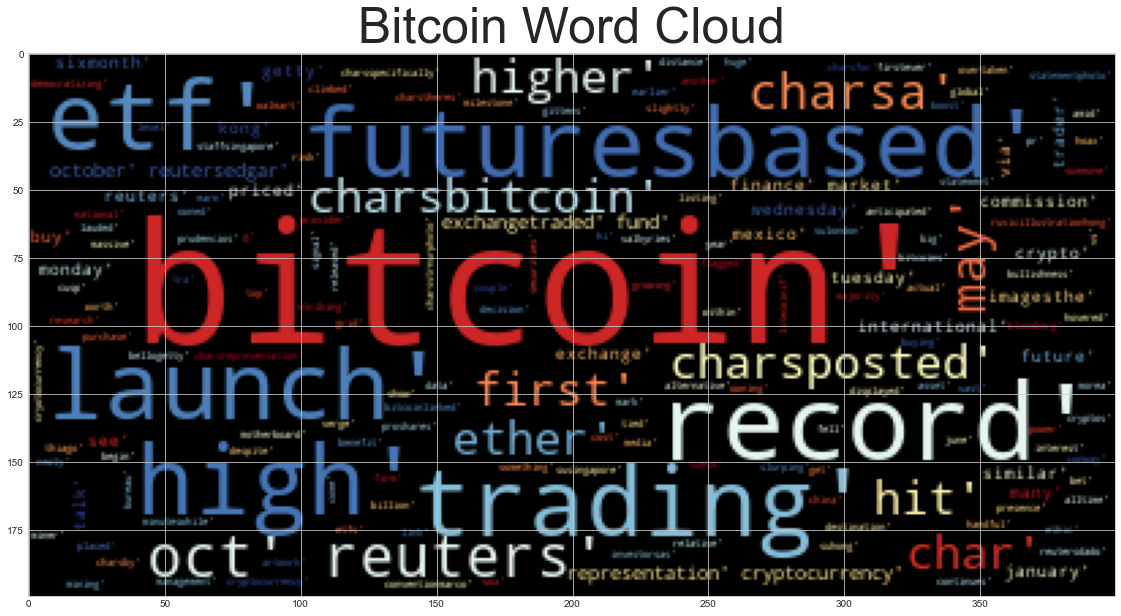

In [26]:
# Generating the Bitcoin word cloud
btc_processed = str(btc_text)

btc_wordcloud = WordCloud(colormap='RdYlBu').generate(btc_processed)
plt.title("Bitcoin Word Cloud", fontsize=50)
plt.imshow(btc_wordcloud)


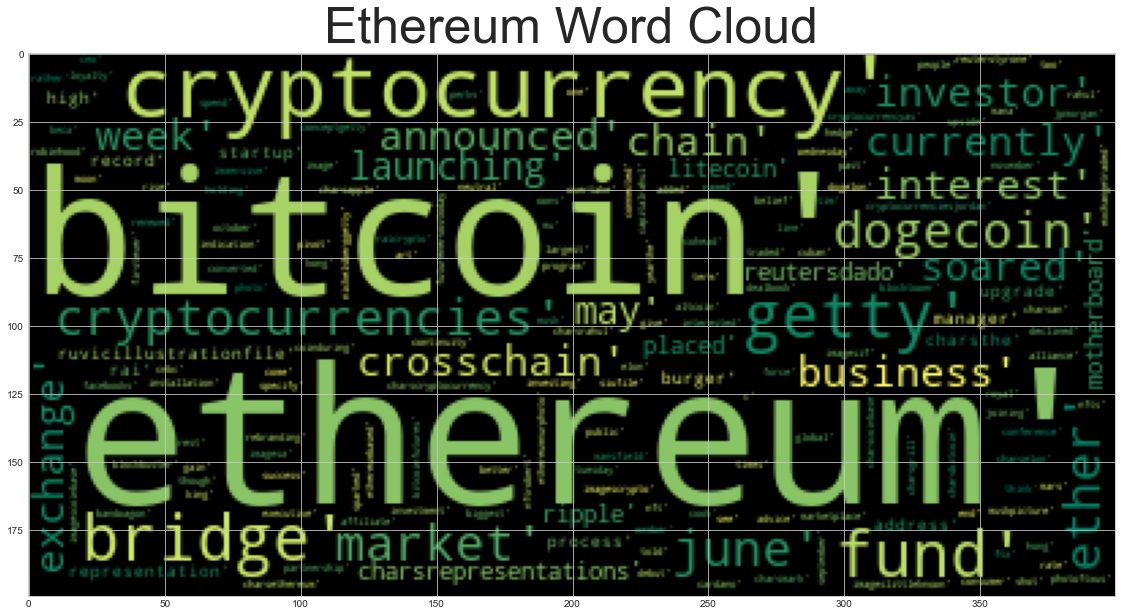

In [27]:
# Generating the Ethereum word cloud
eth_processed = str(eth_text)

eth_wordcloud = WordCloud(colormap='summer_r').generate(eth_processed)
plt.title("Ethereum Word Cloud", fontsize=50)
plt.imshow(eth_wordcloud)


---
## 3. Named Entity Recognition



In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenatinating all of the Bitcoin text together
big_string_btc = ' '.join(btc_df['text'])

In [32]:
# Running the NER processor on all of the text
btc_doc = nlp(big_string_btc)
# Adding a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Rendering the visualization
displacy.render(btc_doc, style='ent')

In [34]:
# Listing all Entities for bitcoin
btc_text = [ent.text for ent in btc_doc.ents]
btc_label = [ent.label_ for ent in btc_doc.ents]

btc_entities = pd.DataFrame(columns=['text','label'])
btc_entities['text'] = btc_text
btc_entities['label'] = btc_label

btc_entities

,text,label
0,earlier this year,DATE
1,Walmart to Litecoin\r\n,ORG
2,Verge,ORG
3,Vox Media,ORG
4,Photo Illustration,PERSON
...,...,...
82,"60,000",MONEY
83,first,ORDINAL
84,six months,DATE
85,Friday,DATE


### Ethereum NER

In [35]:
# Concatenatinating all of the Ethereum text together
big_string_eth = ' '.join(eth_df['text'])

In [36]:
# Running the NER processor on all of the text
eth_doc = nlp(big_string_eth)

# Adding a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Rendering the visualization
displacy.render(eth_doc, style='ent')

In [38]:
# Listing all Entities for ethereum
eth_text = [ent.text for ent in eth_doc.ents]
eth_label = [ent.label_ for ent in eth_doc.ents]

eth_entities = pd.DataFrame(columns=['text','label'])
eth_entities['text'] = eth_text
eth_entities['label'] = eth_label

eth_entities

,text,label
0,Nervos,PERSON
1,today,DATE
2,the Force Bridge,FAC
3,Mark Cuban,PERSON
4,CNBC,ORG
...,...,...
73,Edgar Su,PERSON
74,"Bitcoin, Ethereum",ORG
75,Litecoin,PERSON
76,"June 29, 2021",DATE


---